In [29]:
import yfinance as yf
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [3]:
# https://www.tradingview.com/symbols/SP-OEX/components/

sp100_tickers = [
    'AAPL', 'ABBV', 'ABT', 'ACN', 'AIG', 'AMGN', 'AMT', 'AMZN', 'AVGO', 'AXP', 'BA',
    'BAC', 'BIIB', 'BK', 'BKNG', 'BLK', 'BMY', 'BRK-B', 'C', 'CAT', 'CHTR', 'CL',
    'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX', 'DHR', 'DIS',
    'DOW', 'DUK', 'EMR', 'EXC', 'F', 'FB', 'FDX', 'GD', 'GE', 'GILD', 'GM',
    'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KHC', 'KMI', 'KO',
    'LIN', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'META', 'MMM',
    'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'PEP', 'PFE',
    'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SO', 'SPG', 'T', 'TGT', 'TMO',
    'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC',
    'WMT', 'XOM'
]

In [4]:
start_date = '2014-10-17'
end_date = '2024-10-17'

In [5]:
all_data = {}

# Loop through each ticker
for ticker in sp100_tickers:
    print(f"Downloading data for {ticker}...")
    
    try:
        # Download stock data
        data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
        
        # Store the data
        all_data[ticker] = data
        
        # To avoid getting rate-limited, add a delay
        time.sleep(2)  # Adjust this delay based on API limits
        
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")
        time.sleep(5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KeyboardInterrupt: 

In [6]:
combined_data = pd.concat(all_data, axis=1)

In [7]:
combined_data.to_csv('sp100_stock_data.csv')

In [8]:
print("Download complete.")

Download complete.


In [9]:
combined_data.head()

AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2014-10-17  24.375000  24.750000  24.202499  24.417500  21.680475  272718800   
2014-10-20  24.580000  24.990000  24.555000  24.940001  22.144409  310069200   
2014-10-21  25.754999  25.754999  25.317499  25.617500  22.745966  378495600   
2014-10-22  25.709999  26.027500  25.650000  25.747499  22.861391  273052400   
2014-10-23  26.020000  26.262501  25.907499  26.207500  23.269823  284298800   

                 ABBV                                   ...    AIG             \
                 Open       High        Low      Close  ...    Low      Close   
Date                                                    ...                     
2014-10-17  53.779999  53.900002  52.900002  53.369999  ...  49.98  50.759998   
2014-10-20  52.560001  54.590000  52.250000  54.410000  ...  50.59  51.009998   
2014-10-21  55.299999  56.450001  55.020000  56.290001  ...  51.27  52.150002   
2014-10-22  56.959999  57.450001  56.259998  56.900002  ...  51.66  51.669998   
2014-10-23  58.099998  59.700001  57.880001  59.520000  ...  51.52  51.619999   

                                       AMGN                          \
            Adj Close    Volume        Open        High         Low   
Date                                                                  
2014-10-17  39.941635  10847400  131.250000  139.850006  129.500000   
2014-10-20  40.138351   8868200  133.279999  137.550003  133.009995   
2014-10-21  41.035397   9073000  138.490005  145.490005  137.009995   
2014-10-22  40.657696   7556300  143.809998  144.410004  141.669998   
2014-10-23  40.618347   6829100  145.899994  148.139999  145.240005   

                                             
                 Close   Adj Close   Volume  
Date                                         
2014-10-17  133.690002  100.944092  7351500  
2014-10-20  137.509995  103.828445  6623800  
2014-10-21  144.089996  108.796715  8951400  
2014-10-22  143.639999  108.456985  5222100  
2014-10-23  147.250000  111.182724  4710700  

[5 rows x 36 columns]

In [10]:
for ticker, data in all_data.items():
    file_path = f'stocks/{ticker}.csv'
    data.to_csv(file_path)
    print(f"Saved {ticker} data to {file_path}")

Saved AAPL data to stocks/AAPL.csv
Saved ABBV data to stocks/ABBV.csv
Saved ABT data to stocks/ABT.csv
Saved ACN data to stocks/ACN.csv
Saved AIG data to stocks/AIG.csv
Saved AMGN data to stocks/AMGN.csv


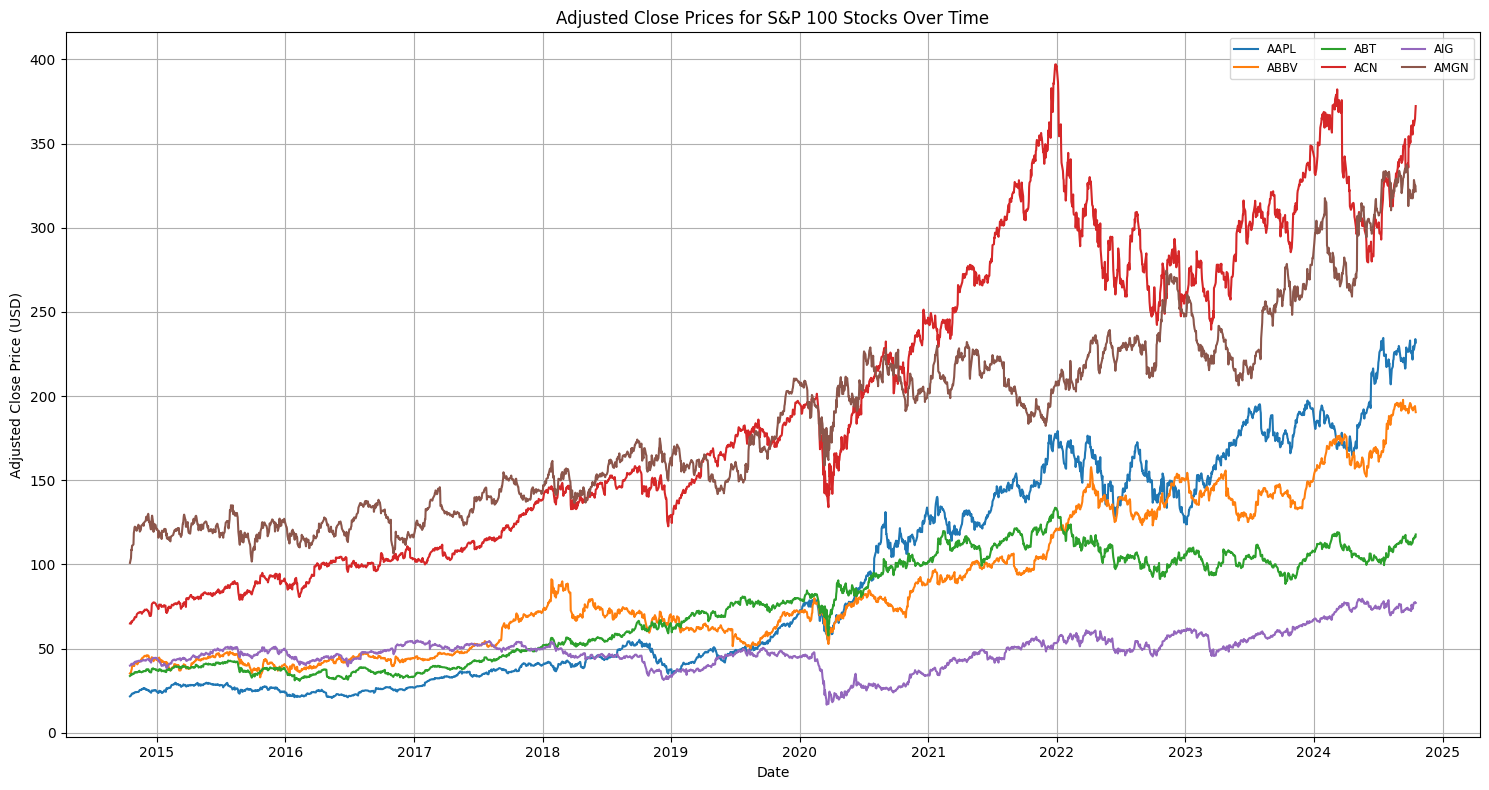

In [11]:
# Create a plot for each stock's Adjusted Close price
plt.figure(figsize=(15, 8))  # Set figure size

for ticker, data in all_data.items():
    if 'Adj Close' in data.columns:  # Ensure Adjusted Close column exists
        plt.plot(data.index, data['Adj Close'], label=ticker)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.title('Adjusted Close Prices for S&P 100 Stocks Over Time')
plt.legend(loc='upper right', fontsize='small', ncol=3)  # Adjust the legend to handle multiple stocks
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [12]:
# Set a non-zero risk-free rate (for example, 4% per year)
risk_free_rate = 0.04

# Dictionary to store modified statistics for each stock
modified_stats = {}

# Loop through each stock's data and compute alternative statistics
for ticker, data in all_data.items():
    if 'Adj Close' in data.columns:
        # Calculate daily returns
        daily_returns = data['Adj Close'].pct_change().dropna()
        
        # Annualized return (geometric mean)
        annualized_return = (1 + daily_returns.mean()) ** 252 - 1
        
        # Annualized volatility (standard deviation of daily returns, scaled by sqrt of 252 trading days)
        annualized_volatility = daily_returns.std() * np.sqrt(252)
        
        # Maximum drawdown (biggest peak-to-trough loss)
        cumulative_returns = (1 + daily_returns).cumprod()
        max_drawdown = (cumulative_returns.cummax() - cumulative_returns).max()
        
        # Sharpe ratio with a non-zero risk-free rate
        sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility if annualized_volatility != 0 else np.nan

        # Store these metrics
        modified_stats[ticker] = {
            'Annualized Return (%)': annualized_return * 100,
            'Annualized Volatility (%)': annualized_volatility * 100,
            'Max Drawdown (%)': max_drawdown * 100,
            'Sharpe Ratio': sharpe_ratio
        }

# Convert the dictionary to a DataFrame for better visualization
modified_stats_df = pd.DataFrame(modified_stats).T

# Display the modified statistics
modified_stats_df

,Annualized Return (%),Annualized Volatility (%),Max Drawdown (%),Sharpe Ratio
AAPL,32.056187,28.530184,255.614868,0.983386
ABBV,22.640240,26.424818,116.574817,0.705407
ABT,16.543849,23.600707,134.151682,0.531503
ACN,22.805083,24.722642,242.597170,0.760642
AIG,12.547534,32.177293,95.695815,0.265639
AMGN,15.817273,24.847498,67.629233,0.475592


In [28]:
def sort_stocks(metric, order):
    ascending_order = True if order == 'Low' else False
    
    sorted_data = modified_stats_df.sort_values(by=metric, ascending=ascending_order)
    display(sorted_data)

# Dropdown to select the metric to sort by
metric_dropdown = widgets.Dropdown(
    options=['Annualized Return (%)', 'Annualized Volatility (%)', 'Max Drawdown (%)', 'Sharpe Ratio'],
    value='Annualized Return (%)',
    description='Sort by:',
    disabled=False,
)

# Dropdown to select ascending or descending order
order_dropdown = widgets.Dropdown(
    options=['Low', 'High'],
    value='High',
    description='Order:',
    disabled=False,
)

# Interactive widget to sort and display the data
widgets.interactive(sort_stocks, metric=metric_dropdown, order=order_dropdown)

interactive(children=(Dropdown(description='Sort by:', options=('Annualized Return (%)', 'Annualized Volatilit…